In [3]:
import scipy.stats as sp
import cv2 as cv,numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import ImageFont, ImageDraw, Image

def imshow(tit,image):
    plt.title(tit)
    if len(image.shape)==3:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(image,cmap='gray')
    plt.show()
    
# def stack(image):
#     images=[]
#     for image in range len(images):
    

Threshold used: 127.0


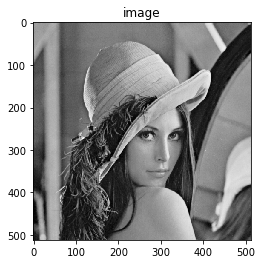

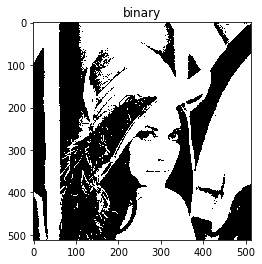

In [4]:
image = cv.imread('Lena.png',0)
thr,mask = cv.threshold(image, 127, 255,cv.THRESH_BINARY)
#튜플이거나  역치, 마스크 = (이미지, (아래값은 0)역치, 역치 이상 나타내는 값, )
print('Threshold used:', thr)

imshow('image',image)
imshow('binary',mask)

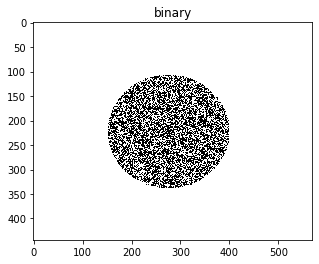

In [18]:
image2 = cv.imread('circle.png',0)
thr,mask = cv.threshold(image2, 55, 255,cv.THRESH_BINARY)
imshow('binary',mask)

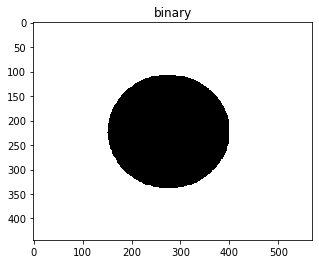

In [17]:
image2 = cv.imread('circle.png',0)
img_blur = cv.GaussianBlur(image2,(5,5),0)
_ ,binary = cv.threshold(img_blur, 127, 255,cv.THRESH_BINARY)
imshow('binary',binary)# 배경과 전경이 뚜렷해서 역치 설정을 어느 정도해도 이진화 가능함.

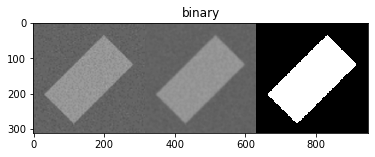

In [30]:
image3 = cv.imread('boxnoise.png',0)
img_blur2 = cv.GaussianBlur(image3,(11,11),0)
_ ,binary2 = cv.threshold(img_blur2, 120, 255,cv.THRESH_BINARY)
imshow('binary',np.hstack([image3,img_blur2,binary2])) #위의 경우와 달리 뚜렷하지 못해 역치 설정값이 중요해짐.

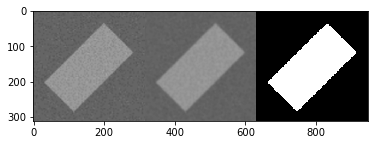

In [35]:
_,binary3 =cv.threshold(
    img_blur2,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
imshow("",np.hstack([image3,img_blur2,binary3]))

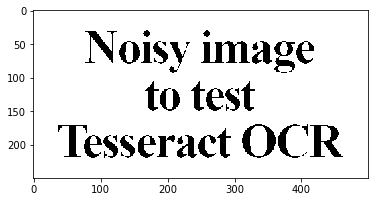

In [68]:
image4 = cv.imread('NoiseImage.png',0)
img_blur3 = cv.GaussianBlur(image4,(7,7),0)
_,binary4 =cv.threshold(
    image4,0,255,cv.THRESH_BINARY)
imshow("",binary4)

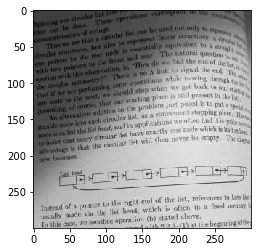

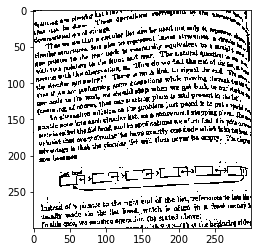

In [4]:
textimage = cv.imread('text.jpg',0)

imshow('',textimage)
text_blur = cv.GaussianBlur(textimage,(3,3),0)
_,binarytext1 =cv.threshold(
    text_blur,30,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
binary = cv.adaptiveThreshold(textimage,
                              255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv.THRESH_BINARY,21,5)#21은 박스의 크기
imshow("",binary)

(300, 225)


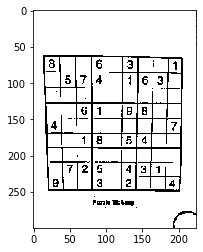

In [96]:
numimg = cv.imread('grid.jpg',0) #binary adaptive으로 해보기
print(numimg.shape)
num_blur = cv.GaussianBlur(numimg,(3,3),0)
_,binarynum =cv.threshold(
    num_blur,30,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
binarynum = cv.adaptiveThreshold(numimg,
                              255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv.THRESH_BINARY,21,5)
imshow("",binarynum)

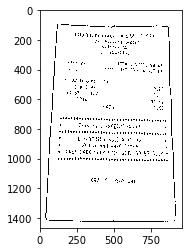

True

In [101]:
receipt = cv.imread('Receipt.jpg',0)
rec_blur = cv.GaussianBlur(receipt,(3,3),0)
rec_blur2 = cv.medianBlur(receipt,7)
# _,binaryrec =cv.threshold(
#     rec_blur,30,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
binaryrec2 = cv.adaptiveThreshold(rec_blur2,
                              255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv.THRESH_BINARY,21,5)
imshow("",binaryrec2)
cv.imwrite('output2.jpg',binaryrec2)

<img src= output2.jpg>

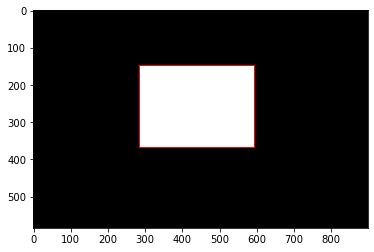

In [176]:
img = cv.imread('shape4.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
_ , shapeimg = cv.threshold(gray,0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)
contours, _ = cv.findContours(shapeimg,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img,contours,-1,(0,0,255),2)
imshow("",img)

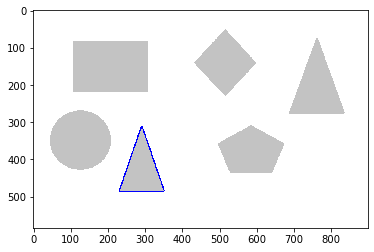

In [63]:
img2 = cv.imread('shape3.png')
gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
_ , mask = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
mask = 255-mask
contours, _ = cv.findContours(mask,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# print(f"shape={len(contours)}")
con =contours[0]
cv.drawContours(img2,[con],-1,(255,0,0),2)#전체중 하나만 contour 할 경우 []안에 표시
imshow("",img2)

shape = 240length=513.7056245803833 appprox=3
shape = 300length=515.9310202598572 appprox=5
shape = 226length=531.8721435070038 appprox=8
shape = 4length=672.0 appprox=4
shape = 298length=616.7178171873093 appprox=3
shape = 56length=493.0336227416992 appprox=4


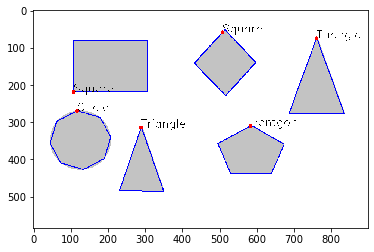

In [14]:
img2 = cv.imread('shape3.png')
gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
_ , mask = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
mask = 255-mask
contours, _ = cv.findContours(mask,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)



for con in contours:
    peri = cv.arcLength(con,True)
    approx = cv.approxPolyDP(con,peri*0.02,True)
    font = cv.FONT_HERSHEY_SIMPLEX
    print(f"shape = {len(con)}length={peri} appprox={len(approx)}")
#     x= con[0][0][0]
#     y= con[0][0][1]
    p = tuple(con[1][0])
#     cv.circle(img,(x,y),10,(0,0,255),-1)
    cv.drawContours(img2,[approx],-1,(255,0,0),2)
    cv.circle(img2,p,5,(0,0,255),-1)
    if len(approx)==3:
        cv.putText(img2,"Triangle",p, font,1,(0))
    elif len(approx)==4:
        cv.putText(img2,"Square",p, font,1,(0))
    elif len(approx)==5:
        cv.putText(img2,"Pentgon",p, font,1,(0))
    else:
        cv.putText(img2,"Circle",p, font,1,(0))
        
imshow("",img2)


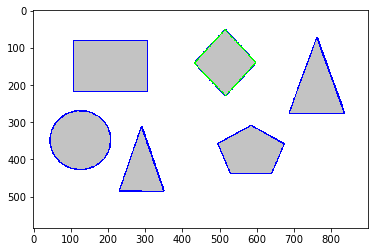

In [5]:
cv.drawContours(img2,[approx],-1,(0,255,0),2)
imshow("",img2)

shape = 155length=422.35742807388306 appprox=8
shape = 238length=526.0731550455093 appprox=14
shape = 100length=317.8721432685852 appprox=4
shape = 182length=475.91377425193787 appprox=9


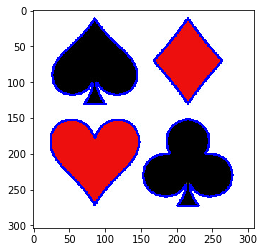

In [10]:
trump = cv.imread('trump_card.png')
gray = cv.cvtColor(trump,cv.COLOR_BGR2GRAY)
_ , mask2 = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
mask2 = 255-mask2
contours2, _ = cv.findContours(mask2,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# print(f"shape={len(contours)}")
# con =contours[0]
cv.drawContours(trump,contours2,-1,(255,0,0),2)#전체중 하나만 contour 할 경우 []안에 표시
for con2 in contours2:
    peri2 = cv.arcLength(con2,True)
    approx2 = cv.approxPolyDP(con2,peri*0.02,True)
    print(f"shape = {len(con2)}length={peri2} appprox={len(approx2)}")
    p = tuple(con[1][0])
#     cv.circle(img,(x,y),10,(0,0,255),-1)
    cv.drawContours(trump,contours2,-1,(255,0,0),2)
    cv.circle(img2,p,5,(0,0,255),-1)
imshow("",trump)

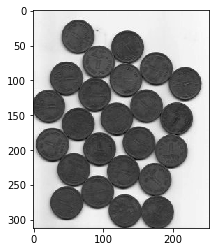

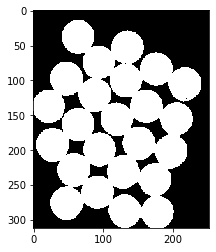

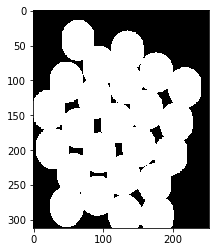

In [61]:
image = cv.imread('water_coins.jpg')
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
imshow('',gray)
_, binary = cv.threshold(gray,127,255,cv.THRESH_BINARY)
binary = 255- binary
imshow('',binary)
eroded = cv.morphologyEx(binary,
                         cv.MORPH_ERODE,#침식
                         (3,3),#9개 픽셀의 커널 사용
                         iterations=5)#
dilated = cv.morphologyEx(binary,
                         cv.MORPH_DILATE,#팽창
                         (3,3),#9개 픽셀의 커널 사용
                         iterations=10)#
imshow('',dilated)

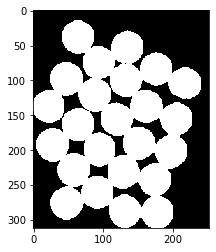

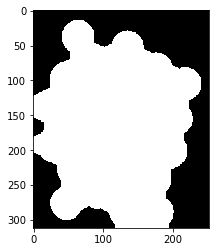

In [67]:
#침식후 팽창 #바이너리 영상에 사용해야 의미가 나타남
opened = cv.morphologyEx(binary,
                         cv.MORPH_OPEN,
                         cv.getStructuringElement(
                             cv.MORPH_ELLIPSE,(5,5)),
                        iterations=5)

closed = cv.morphologyEx(binary,
                         cv.MORPH_CLOSE,
                         cv.getStructuringElement(
                             cv.MORPH_ELLIPSE,(5,5)),
                        iterations=5)

imshow('',opened)
imshow('',closed)

## 동전

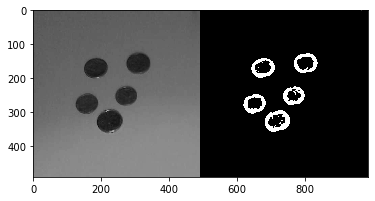

In [72]:
frame = cv.imread('coin.png')
roi = frame.copy()
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
gray_blur = cv.GaussianBlur(gray,(7,7),0)
thresh = cv.adaptiveThreshold(gray_blur,
                              255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv.THRESH_BINARY_INV, 45,6)

imshow('',np.hstack([gray,thresh]))

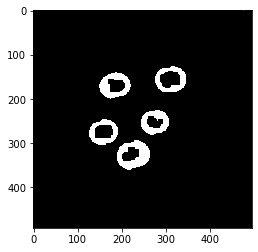

In [76]:
kernel = np.ones((3,3),np.uint8)
closing = cv.morphologyEx(thresh,
                         cv.MORPH_CLOSE,
                         kernel,
                        iterations=5)
imshow('',closing)

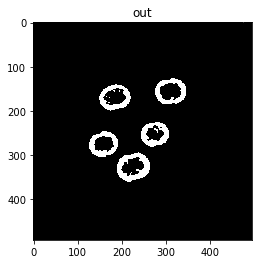

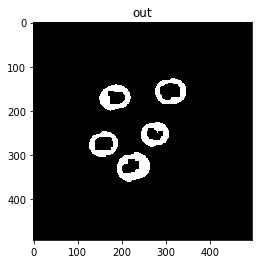

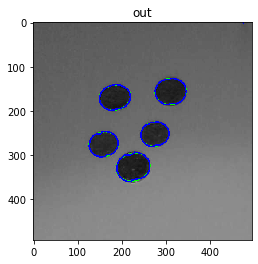

In [81]:
cont_img = closing.copy() #원본이 바뀌는 함수라서 복사한다

contours, _ = cv.findContours(cont_img,
                              cv.RETR_EXTERNAL,
                              cv.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5 :
        continue
#     ellipse = cv.fitEllipse(cnt) # 두점만 있어도 타원으로 맵핑시켜주는 메서드
#     cv.ellipse(roi, ellipse, (0,255,0),2) # BGR
    cv.drawContours(roi,contours,-1,(255,0,0),2)

    
imshow('out',thresh)#adaptivethreshold
imshow('out',cont_img)#팽창후 침식
imshow('out',roi)#원본에 타원 fitting


## 영수증 문제

13


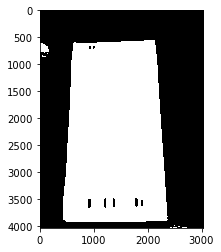

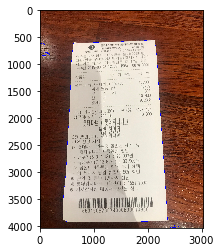

In [65]:
spc = cv.imread('mart2.jpg')
gray = cv.cvtColor(spc,cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,21)
_ , mask2 = cv.threshold(gray, 254, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

#전체중 하나만 contour 할 경우 []안에 표시
closed = cv.morphologyEx(spc2,
                         cv.MORPH_CLOSE,
                         cv.getStructuringElement(
                             cv.MORPH_ELLIPSE,(7,7
                                              )),
                        iterations=5)
contours2, _ = cv.findContours(closed,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contours2))
for cnt in contours2:
    area = cv.contourArea(cnt)
    Maxarea
    if area
#     ellipse = cv.fitEllipse(cnt) # 두점만 있어도 타원으로 맵핑시켜주는 메서드
#     cv.ellipse(roi, ellipse, (0,255,0),2) # BGR
    cv.drawContours(spc,contours2,-1,(255,0,0),2)
imshow("",closed)
imshow("",spc)
